KNOU Deep Learning  
# Chapter 7. Autoencoder and Generative Adversarial Network (GAN)

Bowon KWON  
2024년 12월 6일 생성

## 이미지 압축과 오토인코더 비교


### 1. PNG (Portable Network Graphics): **무손실 압축**
<br>

#### 1.1. 압축 알고리듬
##### 1.1.1. RLE (Run-Length Encoding)
- 동일한 데이터가 반복되는 경우, 반복 횟수와 데이터를 저장하여 압축
- 예: `AAAAA` → `5A`로 저장

##### 1.1.2. Huffman Coding
- 데이터 빈도를 기반으로 짧은 코드(비트)를 생성하여 데이터 압축
- 자주 등장하는 데이터를 짧게, 덜 자주 등장하는 데이터를 길게 표현

##### 1.1.3. DEFLATE 알고리듬
- RLE와 Huffman 코딩을 결합한 알고리듬으로, PNG의 주요 압축 방식

<br>

#### 1.2. 특징
- **무손실 압축**: 데이터 손실 없이 압축 및 복원 가능
- **투명도 지원**: 알파 채널(투명도) 지원
    - (참고)  
      - **R(Red)**, **G(Green)**, **B(Blue)**와 함께 **A(Alpha)** 값을 포함하는 **RGBA** 포맷에서
      - 알파 채널은 이미지 각 픽셀의 투명도를 정의하는 추가적인 데이터
      - 알파 값은 0(완전 투명)에서 1(완전 불투명) 사이로 표현되며, 8비트 기준으로 0~255 범위를 가짐
      - JPEG처럼 알파 채널이 없는 포맷은 모든 픽셀이 완전히 불투명
- **압축 효율**: JPEG보다 낮을 수 있지만, 이미지 품질 유지

### 2. JPEG (Joint Photographic Experts Group): **손실 압축**
<br>

#### 2.1. 압축 알고리듬
##### 2.1.1. 색상 공간 변환 (Color Space Transformation)
- RGB 데이터를 **YCbCr** 색 공간으로 변환
  - `Y`: 밝기 정보
  - `Cb`, `Cr`: 색상 정보

##### 2.1.2. DCT (Discrete Cosine Transform)
- 이미지 데이터를 **주파수 영역**으로 변환
- 저주파(이미지의 큰 특징)와 고주파(세부적인 특징)로 분리

##### 2.1.3. 양자화 (Quantization)
- 주파수 데이터를 압축하기 위해 **정밀도를 낮춤**
  - 예: 12.89 → 13으로 단순화

##### 2.1.4. Huffman Coding
- 양자화 이후 남은 데이터를 Huffman 코딩으로 압축

<br>

#### 2.2. 특징
- **손실 압축**: 데이터 일부를 제거하므로 원본을 완벽히 복원할 수 없음
- **높은 압축률**: 큰 파일 크기를 줄이는 데 효과적
- **사진에 적합**: 색상 변환 및 양자화로 인해 사진처럼 복잡한 이미지를 효율적으로 저장


### 3. GIF (Graphics Interchange Format): **무손실 압축**
<br>

#### 3.1. 압축 알고리듬
- **LZW (Lempel-Ziv-Welch)**  
  * 데이터의 반복 패턴을 식별하여 짧은 코드로 대체하는 알고리듬
  * 예: `ABABAB` → `3(AB)`로 저장

<br>

#### 3.2. 특징
- **무손실 압축**: 데이터를 손실 없이 압축
- **256색 팔레트 제한**: 최대 256색만 지원하므로, 복잡한 이미지는 품질 저하 가능
- **애니메이션 지원**: 여러 프레임을 저장하여 간단한 애니메이션 구현 가능
- **투명도 지원 제한**: 단일색 투명도만 지원. 알파 채널은 지원하지 않음


### 4. PNG, JPEG, GIF 비교

| **특징**              | **PNG**                                    | **JPEG**                          | **GIF**                     |
|-----------------------|--------------------------------------------|-----------------------------------|-----------------------------|
| **압축 종류**         | 무손실 압축                                | 손실 압축                         | 무손실 압축                 |
| **주요 알고리듬**     | RLE, Huffman, DEFLATE                     | DCT, 양자화, Huffman              | LZW                         |
| **품질**              | 원본 그대로 유지                           | 사람의 눈으로는 구별하기 어려운 손실 | 원본 유지 (단, 256색 제한)   |
| **파일 크기**         | 상대적으로 큼                              | 상대적으로 작음                   | 중간 크기                   |
| **적합한 이미지**     | 그래픽, 로고, 텍스트가 포함된 이미지        | 사진과 같이 복잡한 이미지         | 간단한 애니메이션, 로고      |
| **투명도 지원**       | 지원 (알파 채널)                          | 지원하지 않음                     | 단일 투명색 지원            |
| **애니메이션 지원**   | 지원하지 않음                              | 지원하지 않음                     | 지원                        |


### 5. 오토인코더 (Autoencoder)
<br>

#### 5.1. 구조
- **인코더**: 입력 데이터를 잠재 공간(latent space)으로 압축
- **디코더**: 잠재 공간 데이터를 원래 데이터로 복원

<br>

#### 5.2. 특징
- **학습 방식**: 입력과 출력 간의 손실(Loss)을 최소화하도록 학습
- **압축 방식**: 데이터의 패턴을 학습하여 중요한 특징만 추출
- **응용**: 이미지 복원, 노이즈 제거, 데이터 생성 등

<br>

#### 5.3. 장점과 단점
- **장점**: 데이터의 비선형적 특성을 학습하고, 특정 도메인에 맞춘 압축 가능
- **단점**: 대규모 데이터셋 및 학습 시간 필요, 모델 품질에 따라 결과가 달라질 수 있음


### 6. 이미지 압축과 오토인코더의 비교

| **특성**           | **이미지 압축 (PNG, GIF, JPEG)** | **오토인코더**          |
|--------------------|----------------------------------|-------------------------|
| **목적**           | 파일 크기 축소                  | 데이터 특징 추출 및 복원  |
| **손실 여부**      | 손실/비손실 가능                | 일반적으로 손실 있음     |
| **알고리듬**       | RLE, Huffman, DCT 등            | 딥러닝 기반 학습         |
| **응용 분야**      | 저장/전송 효율화                | 데이터 분석, 노이즈 제거  |
| **복잡도**         | 구현이 간단                     | 학습 데이터와 자원이 필요 |


#### 이미지 압축과 오토인코더의 연관성
- 전통적인 이미지 압축(PNG, JPEG)은 **수학적 알고리듬**을 기반으로 데이터 크기를 줄이는 **규칙 기반 접근법**
- 오토인코더는 데이터에서 주요 **특징을 학습**하여 압축하는 **데이터 기반 접근법**

**차이점**:
1. **PNG/JPEG**: 고정된 알고리듬으로 손실/무손실 압축 가능 (예: RLE, Huffman, DCT)
2. **오토인코더**: 인공신경망을 사용하여 데이터 패턴을 학습하고 압축

**장점**:
- 오토인코더는 다양한 데이터 유형에 대해 **맞춤형 압축** 가능
- 새로운 데이터 패턴이 포함된 경우, 학습을 통해 성능 개선 가능

**단점**:
- 전통적 알고리듬보다 학습 및 추론 시간이 오래 걸릴 수 있음
- 모델의 일반화 성능은 학습 데이터에 따라 좌우됨

## 오토인코더의 종류


### 기본 오토인코더 (Basic Autoencoder)
- **구조**:
  - 인코더(Encoder): 입력 데이터를 저차원의 잠재 공간(Latent Space)으로 압축
  - 디코더(Decoder): 잠재 공간에서 데이터를 복원하여 원본과 유사하게 만듦
- **목적**: 데이터를 효율적으로 압축 및 복원
- **특징**: 가장 단순한 형태의 오토인코더로, 입력과 출력 데이터의 차이를 최소화하는 데 초점을 둠

### 스택드 오토인코더 (Stacked Autoencoder)
- **구조**:
  - 여러 층의 인코더와 디코더로 구성된 심층 신경망 형태
  - 각 계층이 데이터를 점진적으로 압축하며, 추출된 특징을 더 잘 학습
- **목적**: 더 복잡한 데이터 패턴을 학습하여 고차원의 데이터를 더 효과적으로 압축
- **특징**: 딥러닝의 구조를 적용하여 데이터의 비선형적 특성을 더 잘 반영

### 노이즈 제거 오토인코더 (Denoising Autoencoder)
- **구조**:
  - 입력 데이터에 노이즈(잡음)를 추가한 후, 원본 데이터를 복원하는 방식
- **목적**: 노이즈가 섞인 데이터를 정화하여 원본 상태로 복원
- **특징**:
  - 데이터를 더 견고하게 학습하여 일반화 성능을 향상시킴
  - 예: 이미지에서 불필요한 픽셀 제거, 손상된 데이터 복원

### 변이형 오토인코더 (Variational Autoencoder, VAE)
- **구조**:
  - 입력 데이터를 압축하여 잠재 공간을 확률 분포(Probability Distribution)로 매핑
  - 잠재 공간에서 샘플링된 값을 디코더가 복원
- **목적**: 데이터의 생성 모델로 활용, 새로운 데이터 생성 가능
- **특징**:
  - 입력 데이터의 특징을 학습하면서, 잠재 공간에서 새로운 데이터 샘플 생성

- 변이형 오토인코더 (VAE) 응용 사례
  - **이미지 생성**:
    - 학습된 잠재 공간을 사용해 새로운 이미지를 생성 (예: 얼굴 합성, 스타일 변환)
  - **데이터 증강**:
    - 기존 데이터에서 변이형 데이터를 생성하여 데이터 부족 문제 해결
  - **이상 탐지**:
    - 정상 데이터로 학습된 VAE는 비정상 데이터를 복원하지 못하는 특성을 활용
    - 예: 제조 공정의 결함 탐지, 금융 사기 탐지
  - **텍스트 및 음성 생성**:
    - 자연어 처리(NLP)와 음성 생성 분야에서도 활용 가능
    - 예: 챗봇 생성, 텍스트 요약
  - **의료 영상 분석**:
    - 의료 데이터(예: CT, MRI)를 잠재 공간에 표현하여 암 진단 및 이상 탐지 등에 활용


### 오토인코더 종류 비교 표

| **종류**                 | **구조**                        | **목적**                             | **특징**                               |
|--------------------------|----------------------------------|---------------------------------------|---------------------------------------|
| **기본 오토인코더**       | 단일 인코더-디코더 구조          | 데이터 압축 및 복원                  | 간단한 구조, 입력과 출력 데이터 차이 최소화 |
| **스택드 오토인코더**     | 여러 계층의 인코더-디코더 구조   | 복잡한 데이터 패턴 학습              | 심층 신경망 구조, 비선형 데이터 처리    |
| **노이즈 제거 오토인코더**| 노이즈 제거 후 원본 복원         | 데이터 정화 및 복원                  | 노이즈에 강건한 데이터 학습            |
| **변이형 오토인코더**     | 잠재 공간을 확률 분포로 매핑     | 데이터 생성 및 특징 학습             | 새로운 데이터 생성 가능, 생성 모델 활용 |


## [교재 실습 코드 7-1-0] 오토인코더



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Flatten, Reshape
from keras.datasets import mnist
from keras.models import Model

In [ ]:
# MNIST 데이터셋 로드 (이미지만 사용, 레이블은 사용하지 않음)
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 정규화 (0~255 범위의 픽셀 값을 0~1 사이로 변환)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 입력 차원 (28x28 이미지를 1차원으로 펼침)
input_dim = 784
# 잠재 공간의 차원 (압축된 표현의 크기)
latent_dim = 64

# 오토인코더 클래스 정의
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim  # 잠재 공간 차원 설정
    # 인코더 정의: 입력 데이터를 압축
    self.encoder = tf.keras.Sequential([
      Flatten(),  # 28x28 이미지를 1차원 벡터로 변환
      Dense(latent_dim, activation='relu'),  # 잠재 공간으로 매핑
    ])
    # 디코더 정의: 잠재 공간 데이터를 원본 형태로 복원
    self.decoder = tf.keras.Sequential([
      Dense(input_dim, activation='sigmoid'),  # 원본 차원으로 확장
      Reshape((28, 28))  # 1차원 데이터를 28x28 이미지로 변환
    ])

  # 호출 시 동작 정의: 인코더 -> 디코더로 데이터를 처리
  def call(self, input_data):
    encoded_data = self.encoder(input_data)  # 입력 데이터를 잠재 공간으로 압축
    encoded_data = self.decoder(encoded_data)  # 압축된 데이터를 복원
    return encoded_data

In [ ]:
# Autoencoder 객체 생성
autoencoder = Autoencoder(latent_dim)
# 오토인코더 모델 컴파일 (최적화 알고리: Adam, 손실 함수: MSE)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
autoencoder.fit(
    x_train, x_train,  # 입력 데이터와 출력 데이터가 동일 (입력 -> 복원)
    epochs=50,  # 학습 반복 횟수
    batch_size=256,  # 배치 크기
    shuffle=True,  # 데이터를 무작위로 섞어 학습
    validation_data=(x_test, x_test)  # 검증 데이터
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0951 - val_loss: 0.0317
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0285 - val_loss: 0.0205
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0193 - val_loss: 0.0149
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0143 - val_loss: 0.0116
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0112 - val_loss: 0.0094
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/st

In [ ]:
# 테스트 데이터로 인코딩 및 디코딩 수행
encoded_imgs = autoencoder.encoder(x_test)  # 인코더를 사용해 압축
decoded_imgs = autoencoder.decoder(encoded_imgs)  # 디코더를 사용해 복원

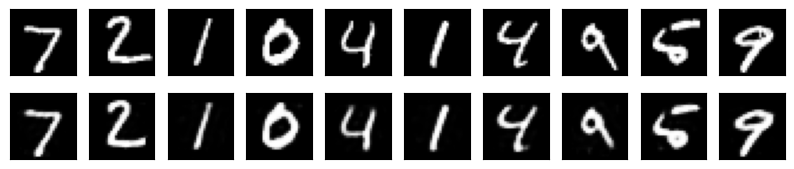

In [ ]:
# 복원 결과 시각화
n = 10  # 표시할 이미지 개수
plt.figure(figsize=(10, 2))  # 전체 플롯 크기 설정
for i in range(n):
  # 원본 이미지
  ax = plt.subplot(2, n, i + 1)  # 첫 번째 행
  plt.imshow(x_test[i])  # 테스트 데이터 원본 이미지
  plt.gray()  # 회색조로 표시
  ax.get_xaxis().set_visible(False)  # X축 숨김
  ax.get_yaxis().set_visible(False)  # Y축 숨김

  # 복원된 이미지
  ax = plt.subplot(2, n, i + 1 + n)  # 두 번째 행
  plt.imshow(decoded_imgs[i])  # 복원된 이미지
  plt.gray()  # 회색조로 표시
  ax.get_xaxis().set_visible(False)  # X축 숨김
  ax.get_yaxis().set_visible(False)  # Y축 숨김
plt.show()  # 플롯 표시

## [추가 실습 코드 7-1-1] 노이즈 제거 오인코더

In [ ]:
# 노이즈 제거 오토인코더 데이터 준비
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# MNIST 데이터 로드
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 정규화 및 Flatten
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

# 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# 오토인코더 모델 정의
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 학습
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.3165 - val_loss: 0.1665
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1594 - val_loss: 0.1397
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1374 - val_loss: 0.1274
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1267 - val_loss: 0.1214
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1209 - val_loss: 0.1180
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1177 - val_loss: 0.1157
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1154 - val_loss: 0.1142
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1136 - val_loss: 0.1129
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.1125 - val_loss: 0.1121
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1115 - val_loss: 0.1113


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


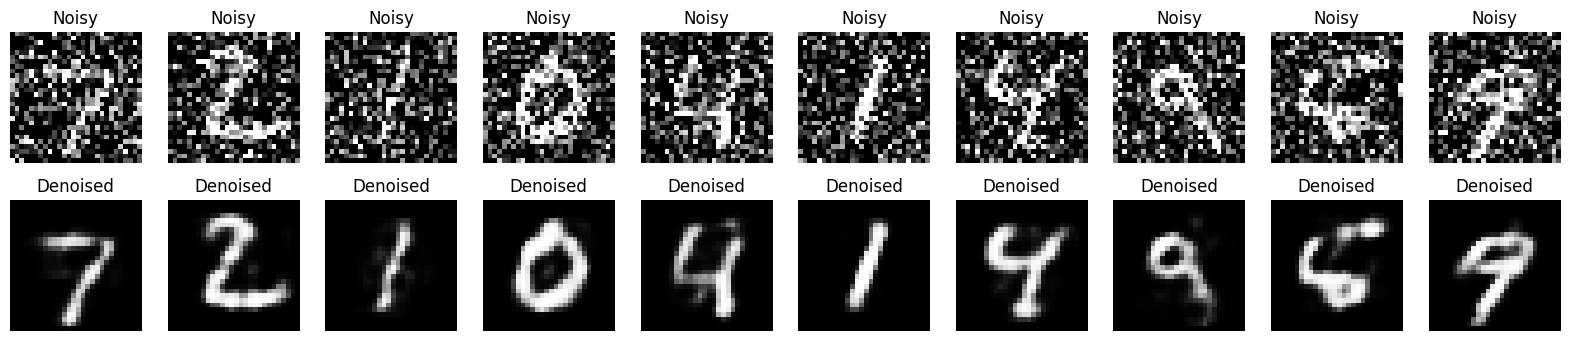

In [ ]:
# 결과 확인
decoded_imgs = autoencoder.predict(x_test_noisy)

# 시각화
n = 10  # 표시할 이미지 개수
plt.figure(figsize=(20, 4))
for i in range(n):
    # 노이즈 입력 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Noisy")

    # 복원된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Denoised")
plt.show()

## [추가 실습 코드 7-1-2] 변이형 오토인코더 (VAE)

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf

# 잠재 공간 샘플링 함수 정의
# VAE의 주요 특징: 평균(z_mean)과 분산(z_log_var)을 사용해 랜덤 샘플링
def sampling(args):
    z_mean, z_log_var = args  # 잠재 공간의 평균과 로그 분산
    # epsilon: 표준 정규분포에서 샘플링된 무작위 값
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], tf.shape(z_mean)[1]))
    # z = 평균 + (표준편차 * epsilon)
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
# 하이퍼파라미터 설정
input_dim = 784  # 입력 데이터 차원 (28x28 이미지를 펼친 형태)
latent_dim = 2   # 잠재 공간 차원 (2차원으로 압축)

# 입력 데이터 정의
inputs = Input(shape=(input_dim,))  # 입력 데이터 (28x28 이미지를 펼친 형태)

# 인코더 정의
# 입력 데이터를 잠재 공간으로 변환하는 과정
h = Dense(128, activation='relu')(inputs)  # 중간 계층
z_mean = Dense(latent_dim, name="z_mean")(h)  # 잠재 공간의 평균
z_log_var = Dense(latent_dim, name="z_log_var")(h)  # 잠재 공간의 로그 분산
z = Lambda(sampling, name="z")([z_mean, z_log_var])  # 샘플링된 잠재 공간 값

In [ ]:
# 디코더 정의
# 잠재 공간 값을 복원하여 원본 데이터와 유사하게 출력
decoder_h = Dense(128, activation='relu')  # 중간 계층
decoder_mean = Dense(input_dim, activation='sigmoid')  # 출력 계층 (복원된 데이터)
h_decoded = decoder_h(z)  # 잠재 공간에서 복원
x_decoded_mean = decoder_mean(h_decoded)  # 최종 복원된 출력

# VAE 모델 정의
vae = Model(inputs, x_decoded_mean, name="vae")

In [ ]:
# Lambda 레이어를 사용하여 복원 손실과 KL 손실을 모델 그래프 내부에서 처리

# 복원 손실 (Reconstruction Loss) 계산
def reconstruction_loss(inputs, outputs):
    return tf.reduce_sum(
        tf.keras.losses.binary_crossentropy(inputs, outputs), axis=-1
    )

# KL 손실 (Kullback-Leibler Divergence) 계산
def kl_loss(z_mean, z_log_var):
    return -0.5 * tf.reduce_sum(
        1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1
    )

# VAE 모델의 총 손실 정의
class VAELossLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(VAELossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        inputs, outputs, z_mean, z_log_var = inputs
        r_loss = reconstruction_loss(inputs, outputs)
        kl_loss_value = kl_loss(z_mean, z_log_var)
        self.add_loss(tf.reduce_mean(r_loss + kl_loss_value))  # 총 손실을 그래프에 추가
        return outputs

# 손실 계층 추가
vae_output = VAELossLayer()([inputs, x_decoded_mean, z_mean, z_log_var])

# 최종 VAE 모델 정의
vae = Model(inputs, vae_output, name="vae")

# 모델 컴파일
vae.compile(optimizer='adam')

In [ ]:
# MNIST 데이터 로드
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()  # 레이블은 사용하지 않음
x_train = x_train.astype("float32") / 255.  # 정규화 (0~1 사이 값으로 스케일링)
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), input_dim))  # 28x28 → 784
x_test = np.reshape(x_test, (len(x_test), input_dim))

In [ ]:
# 모델 학습
vae.fit(x_train, epochs=10, batch_size=256, validation_data=(x_test, None))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 108.9257 - val_loss: 65.6239
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 64.5434 - val_loss: 61.5879
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 61.1729 - val_loss: 58.9981
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 58.9389 - val_loss: 58.0217
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 57.9867 - val_loss: 57.5164
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 57.5035 - val_loss: 57.2665
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 57.2771 - val_loss: 56.9352
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 56.7982 - val_loss: 56.7067
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 56.7347 - val_loss: 56.4997
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 56.4725 - val_loss: 56.3202


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


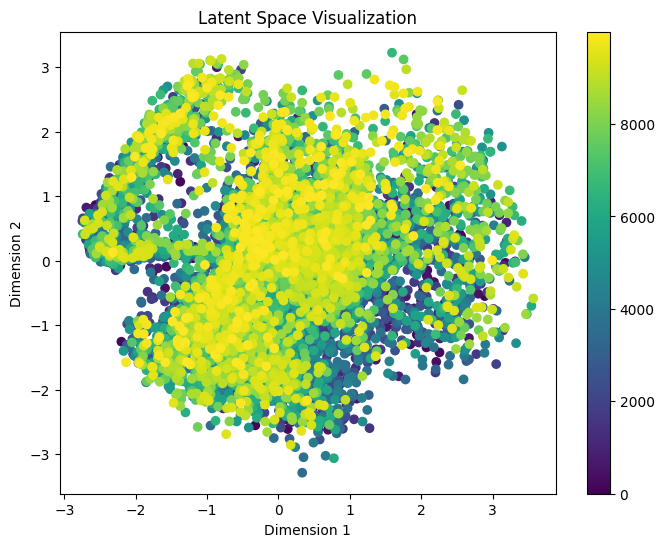

In [ ]:
# 잠재 공간 시각화
# 잠재 공간에서 평균(z_mean)을 추출해 2차원으로 시각화
encoder = Model(inputs, z_mean)  # 인코더에서 잠재 공간의 평균을 추출
z_mean_encoded = encoder.predict(x_test)  # 테스트 데이터의 잠재 공간 매핑

plt.figure(figsize=(8, 6))
plt.scatter(z_mean_encoded[:, 0], z_mean_encoded[:, 1], c=np.arange(len(z_mean_encoded)), cmap="viridis")
plt.colorbar()
plt.title("Latent Space Visualization")  # 잠재 공간 분포 시각화
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## Generative Adversarial Network (GAN)




### GAN 개요
- GAN은 **생성 모델**의 하나로, 두 개의 신경망인 **생성자(Generator)**와 **판별자(Discriminator)**가 경쟁하며 학습
- Ian Goodfellow가 2014년 제안 ([논문 링크](https://arxiv.org/abs/1406.2661))
- 구성 요소:
  - **생성자(Generator)**:
   - 임의의 **노이즈 벡터**(z)를 입력으로 받아, 이를 변환하여 실제 데이터와 유사한 데이터를 생성
  - **판별자(Discriminator)**:
   - 입력된 데이터가 실제(real)인지 생성된(fake) 데이터인지 판별
- 응용 분야
  - 이미지 생성: 얼굴 합성, 스타일 변환, 고해상도 이미지 생성
  - 데이터 증강: 새로운 데이터를 생성하여 학습 데이터 부족 문제 해결
  - 의료 데이터: 의료 영상 생성 및 데이터 보강
  - 텍스트 및 음성 생성: GAN을 활용한 문장 생성, 음성 보정 및 합성


### GAN 학습 과정
- 생성자: 생성자는 판별자를 속이기 위해 실제 데이터와 유사한 데이터를 생성
- 판별자 판별자는 실제 데이터와 생성된 데이터를 정확히 구분하도록 학습
- 경쟁적 학습: 생성자와 판별자가 서로를 향상시키며 균형을 이룸
- **`min_G max_D E[log(D(x))] + E[log(1-D(G(z)))]`**
- 손실함수로 **이진 교차 엔트로피(binary cross entropy)** 사용


### GAN의 한계 및 개선
* **한계**:
   - 학습 불안정성: 생성자와 판별자의 균형을 유지하기 어려움
   - 모드 붕괴(Mode Collapse): 특정 유형의 데이터만 생성
   - 높은 계산 비용: 학습 시간과 자원 소모가 큼
* **개선 모델**:
   - **DCGAN (Deep Convolutional GAN)**: CNN 기반으로 안정성 강화 ([논문 링크](https://arxiv.org/abs/1511.06434))
   - **WGAN (Wasserstein GAN)**: 손실 함수 개선으로 학습 안정화 ([논문 링크](https://arxiv.org/abs/1701.07875))
   - **CGAN (Conditional GAN)**: 조건 추가해 특정 데이터 생성 ([논문 링크](https://arxiv.org/abs/1411.1784))
   - **StyleGAN**: 고해상도 이미지 생성에 특화 ([논문 링크](https://arxiv.org/abs/1812.04948))


## [교재 실습 코드 7-2] GAN

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU, Reshape
from keras.datasets import fashion_mnist

In [ ]:
# Fashion-MNIST 데이터셋 로드
(X_train, _), (_, _) = fashion_mnist.load_data()  # 레이블은 사용하지 않음
X_train = X_train[:10000]
X_train = X_train / 255.0  # 데이터를 0~1 사이 값으로 정규화

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 생성자(Generator) 모델 정의
# 입력: 랜덤 노이즈 벡터 (100차원)
# 출력: 28x28 크기의 이미지

generator = Sequential()

# 첫 번째 Dense 층: 512개의 뉴런, 입력은 100차원 노이즈 벡터
generator.add(Dense(512, input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))  # LeakyReLU 활성화 함수 적용

# 두 번째 Dense 층: 256개의 뉴런
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))

# 세 번째 Dense 층: 128개의 뉴런
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))

# 네 번째 Dense 층: 28x28x1 (Fashion-MNIST 이미지 크기)로 변환
generator.add(Dense(784))
generator.add(Reshape([28, 28, 1]))  # 이미지를 28x28x1 형태로 재구성

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# 판별자(Discriminator) 모델 정의
# 입력: 28x28 크기의 이미지
# 출력: 실제(real) 또는 가짜(fake) 데이터 판별 (0 또는 1)

discriminator = Sequential()

# 첫 번째 Dense 층: 1개의 뉴런, 입력은 28x28x1 크기 이미지
discriminator.add(Dense(1, input_shape=[28, 28, 1]))

# 입력 이미지를 평탄화 (Flatten)
discriminator.add(Flatten())

# 두 번째 Dense 층: 256개의 뉴런
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# 세 번째 Dense 층: 128개의 뉴런
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))

# 네 번째 Dense 층: 64개의 뉴런
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))

# 최종 출력: 1개의 뉴런, 소프트맥스 활성화로 확률 출력
discriminator.add(Dense(1, activation='softmax'))

# 판별자 컴파일
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# GAN 모델 정의: 생성자와 판별자를 결합
# 판별자를 학습하지 않도록 설정 (GAN 학습 시 생성자만 학습)
discriminator.trainable = False

GAN = Sequential([generator, discriminator])

# GAN 모델 컴파일
# 생성자가 판별자를 속이는 방향으로 학습
GAN.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# GAN 학습 파라미터
epochs = 5           # 총 학습 에포크
batch_size = 128       # 배치 크기
noise_shape = 100     # 생성자 입력 노이즈 벡터 크기

# 학습 루프
for epoch in range(epochs):
    for i in range(X_train.shape[0] // batch_size):  # 배치 단위로 학습
        # 1. 랜덤 노이즈 생성
        noise = np.random.normal(size=[batch_size, noise_shape])
        gen_image = generator.predict_on_batch(noise)  # 생성자 출력 이미지(가)

        # 2. 실제 이미지 배치 준비
        train_dataset = X_train[i * batch_size:(i + 1) * batch_size]

        # 3. 판별자 학습: 실제 데이터에 대한 손실
        train_label = np.ones(shape=(batch_size, 1))  # 실제 데이터 레이블 (1)
        discriminator.trainable = True  # 판별자 학습 가능 설정
        d_loss_real = discriminator.train_on_batch(train_dataset, train_label)

        # 4. 판별자 학습: 생성된 데이터에 대한 손실
        train_label = np.zeros(shape=(batch_size, 1))  # 생성된 데이터 레이블 (0)
        d_loss_fake = discriminator.train_on_batch(gen_image, train_label)

        # 5. 생성자 학습 (GAN 모델 학습)
        noise = np.random.normal(size=[batch_size, noise_shape])  # 새로운 노이즈 생성
        train_label = np.ones(shape=(batch_size, 1))  # 생성된 데이터가 실제처럼 보이도록 학습
        discriminator.trainable = False  # 판별자는 학습하지 않도록 설정
        d_g_loss_batch = GAN.train_on_batch(noise, train_label)

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (128, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


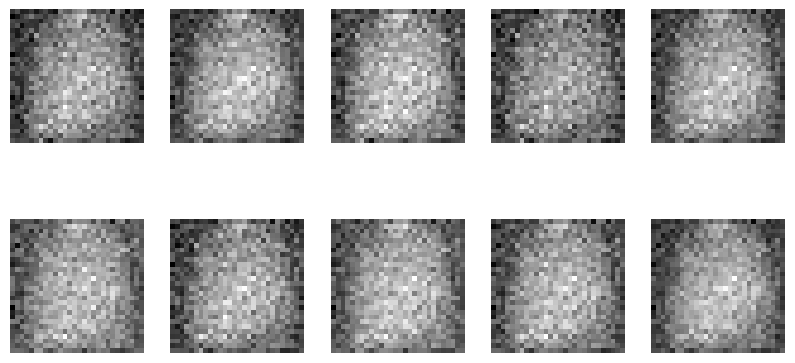

In [ ]:
# 10개의 랜덤 노이즈 생성
noise = np.random.normal(size=[10, noise_shape])

# 생성자를 통해 이미지를 생성
gen_image = generator.predict(noise)

# 생성된 이미지 시각화
fig, axe = plt.subplots(2, 5, figsize=(10, 5))  # 2x5 그리드 생성
idx = 0
for i in range(2):
    for j in range(5):
        axe[i, j].imshow(gen_image[idx].reshape(28, 28), cmap='gray')  # 28x28 이미지로 변환
        axe[i, j].axis('off')  # 축 표시 끄기
        idx += 1
plt.show()